Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)              True
Loud Cover                   True
Pressure (millibars)         True
Daily Summary                True
dtype: bool
Есть пустые значения Precip Type


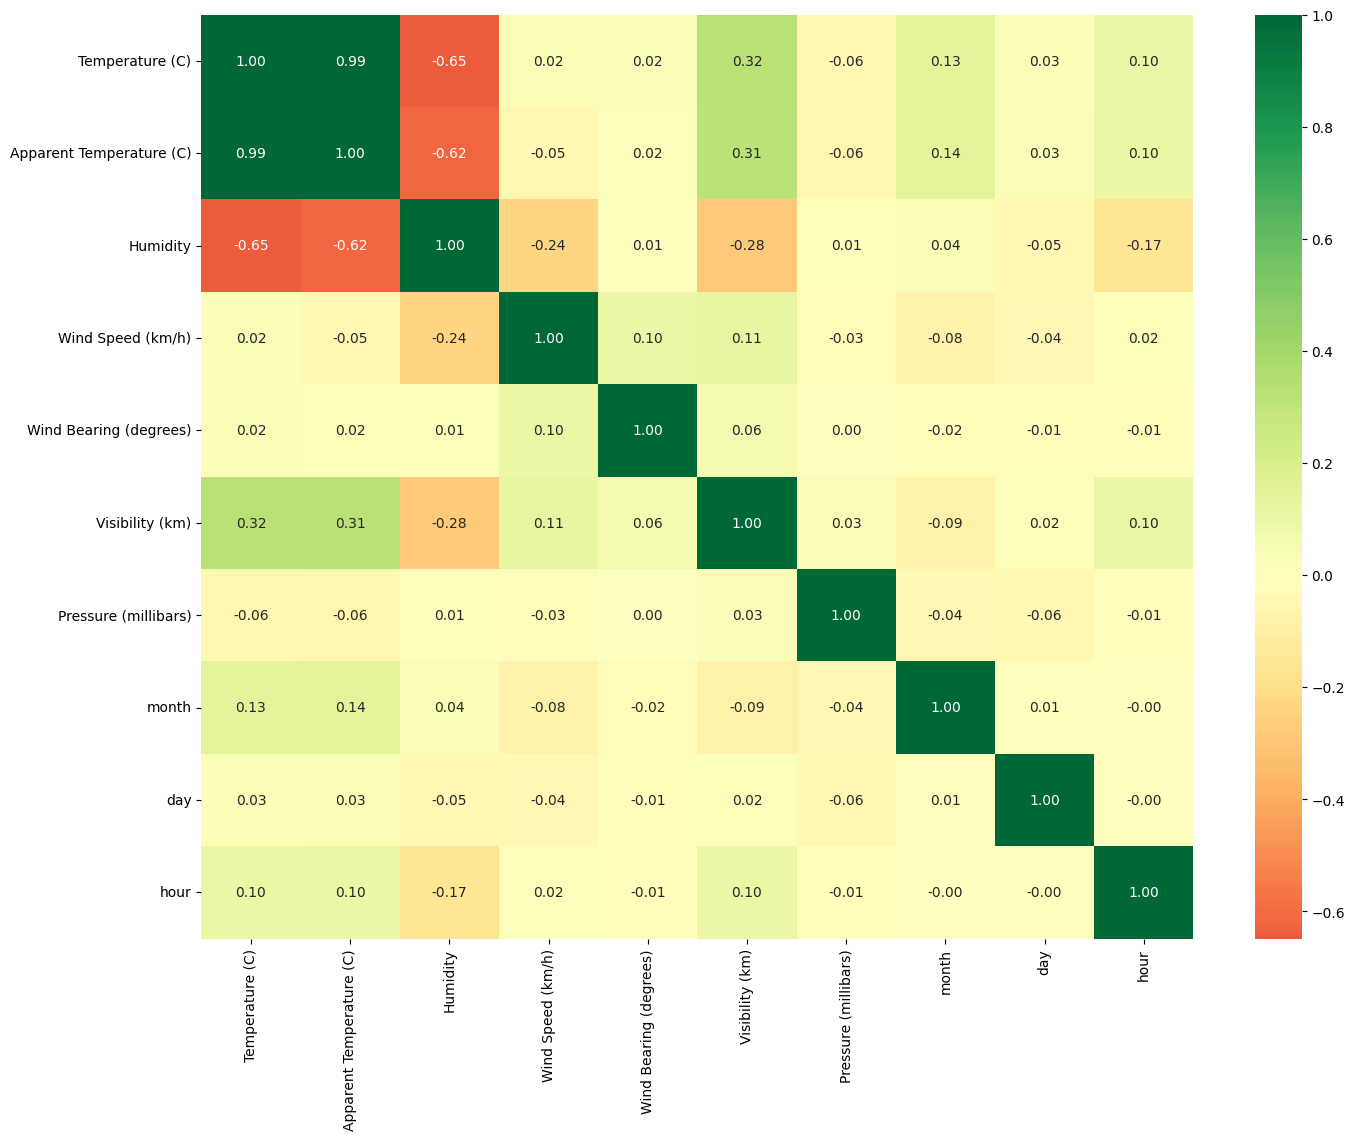

из этой корреляции можно сделать следующие выводы
настоящая температура почти сходна с ощущаемой
в высокую влажность температура сильно ниже, также есть связь с видимостью (потому что видимость также ниже при высокой влажности)
также температура в этом месте немного меняется в течение дня или в разные месяцы (есть корр. с часами и месяцами
от остальных параметров темп. почти не зависит


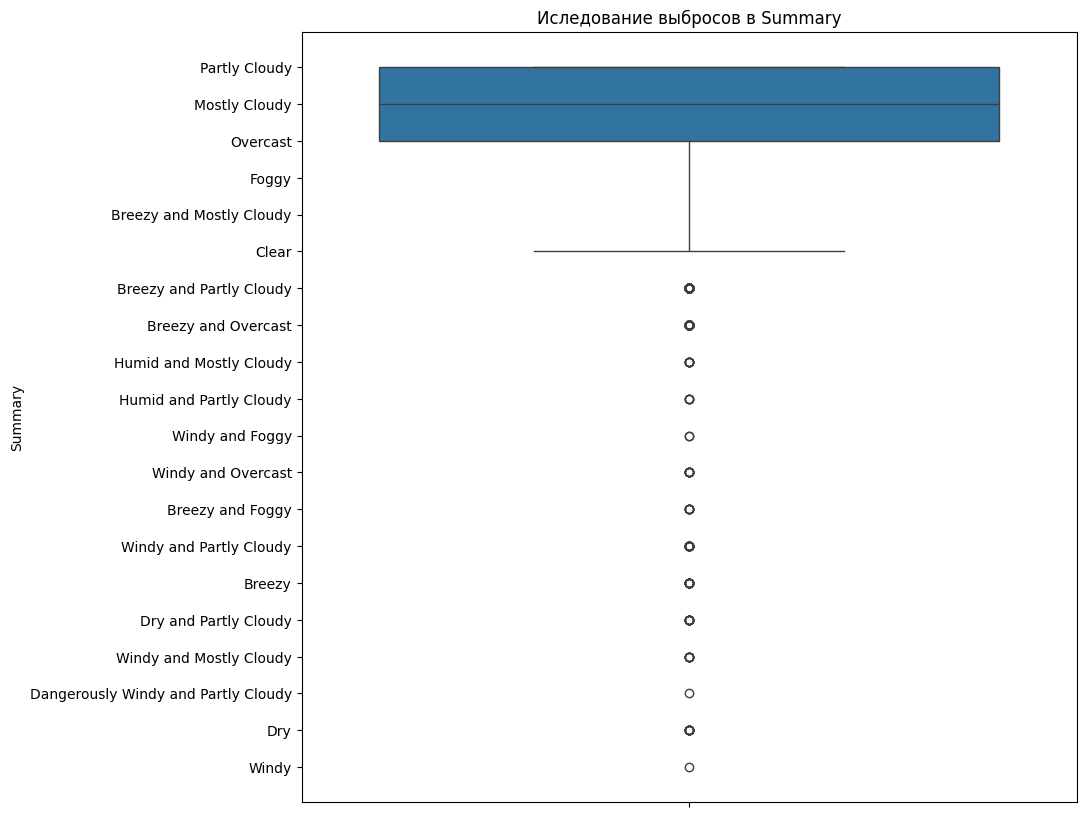

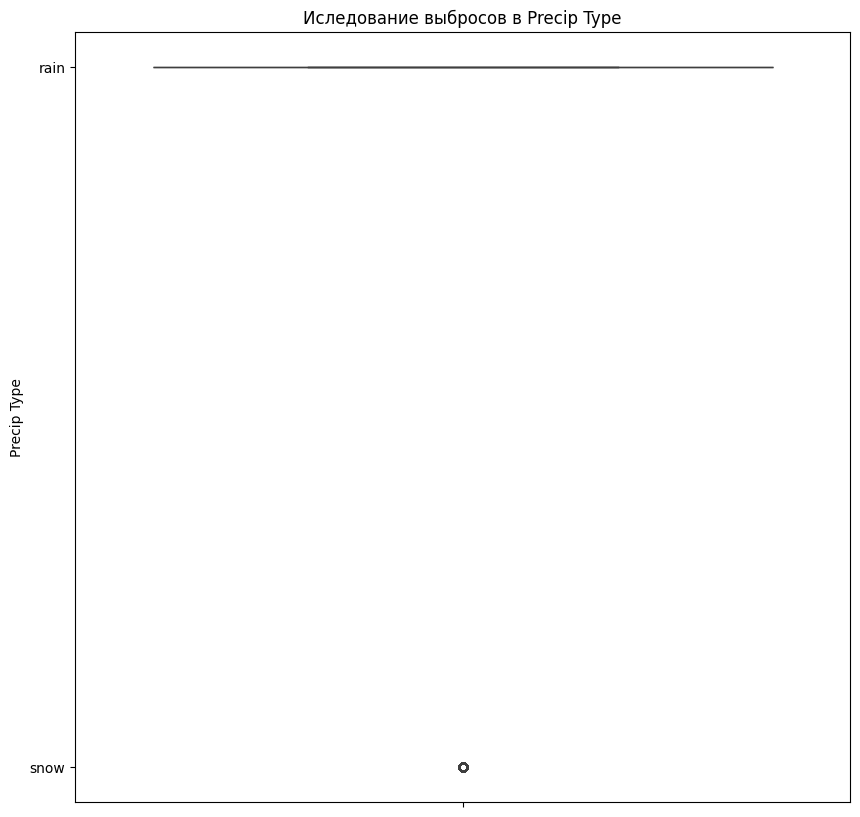

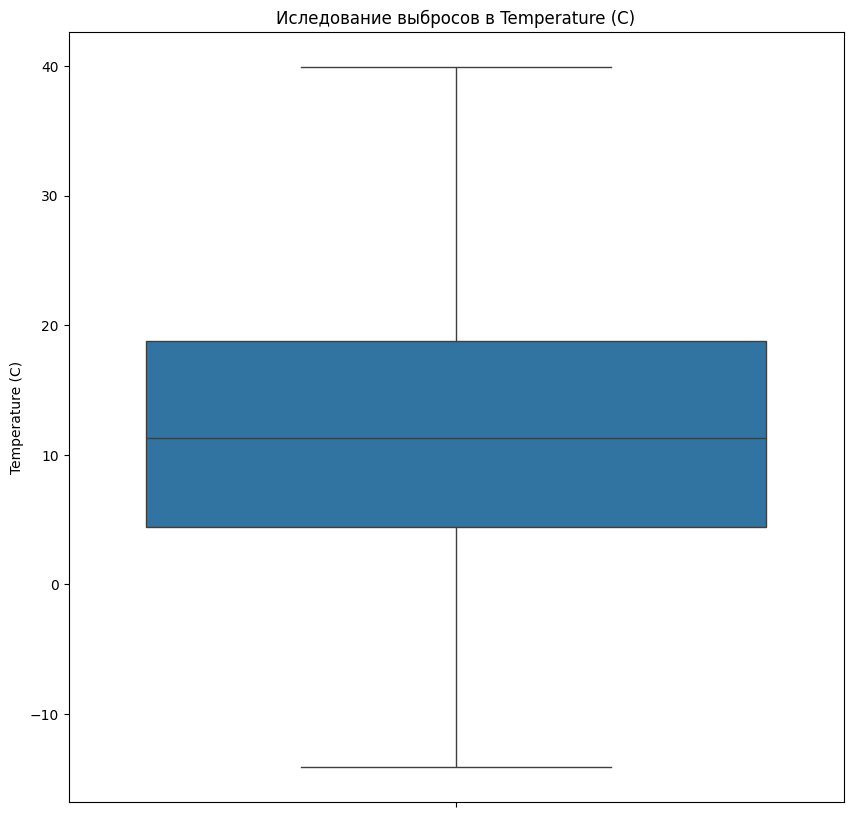

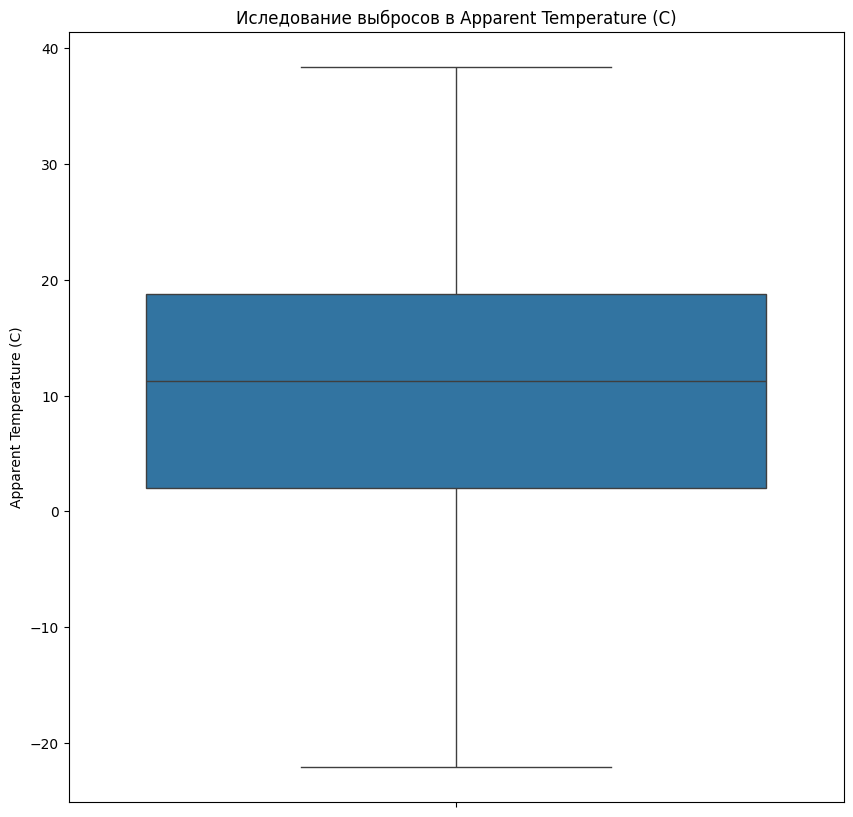

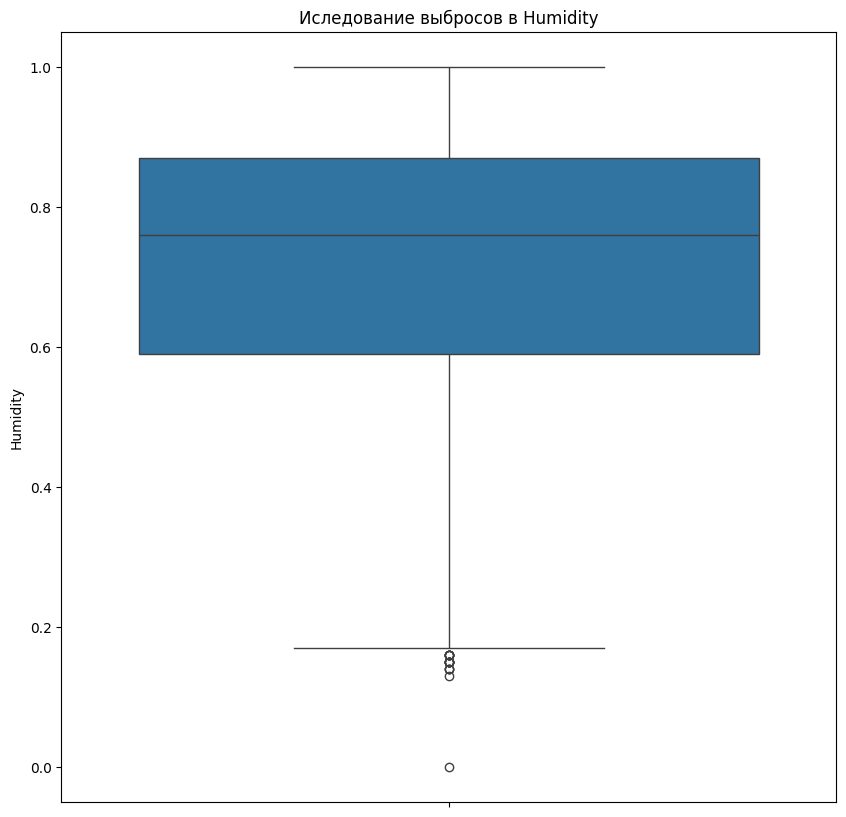

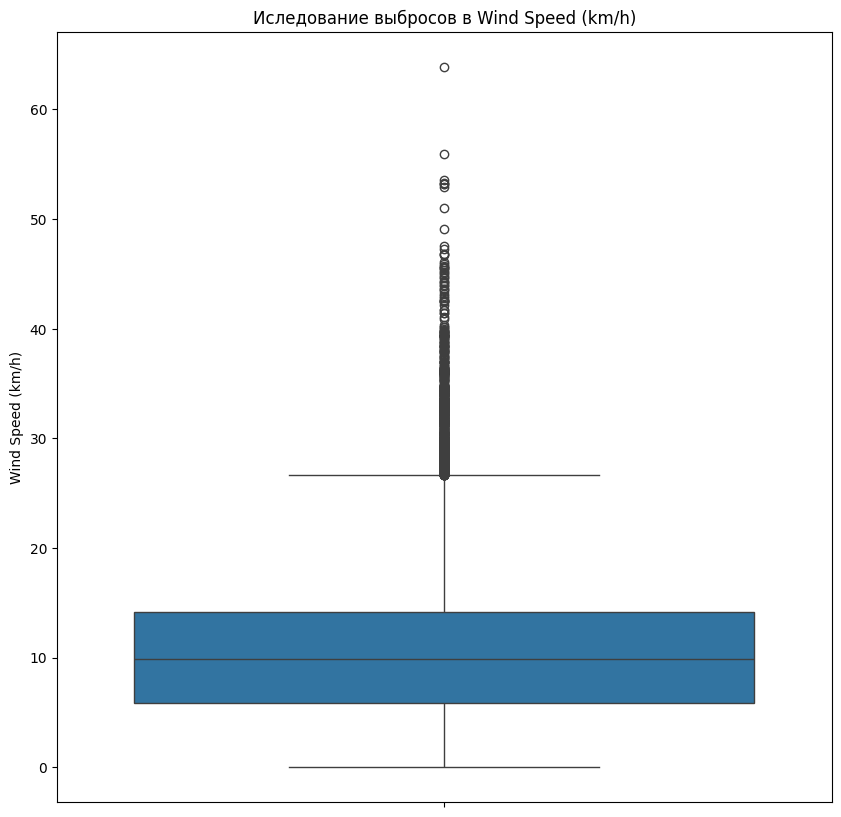

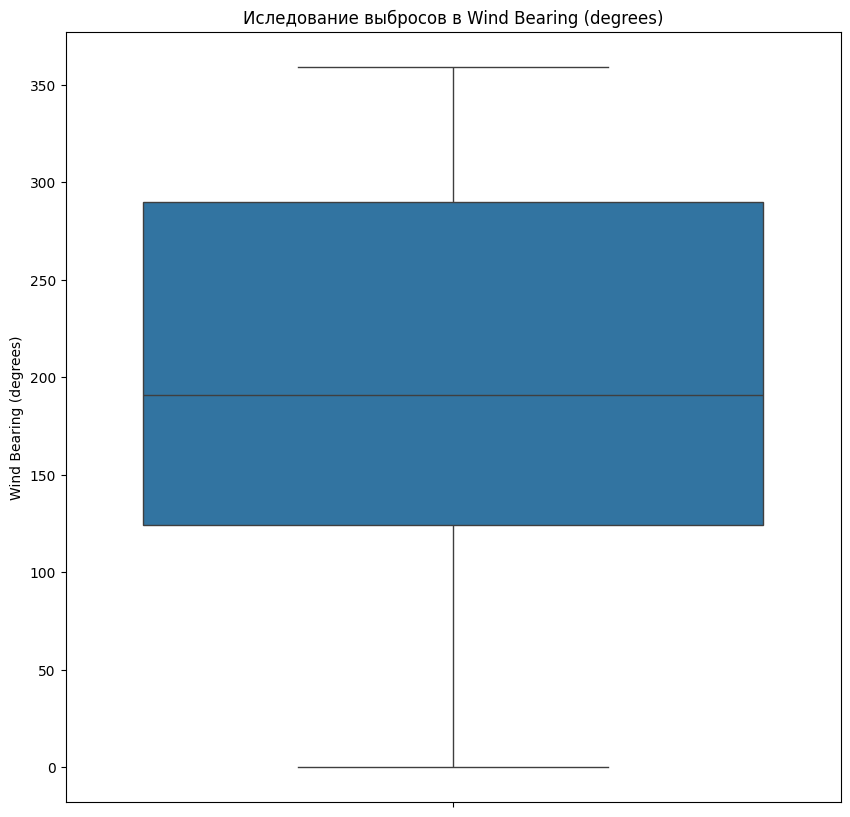

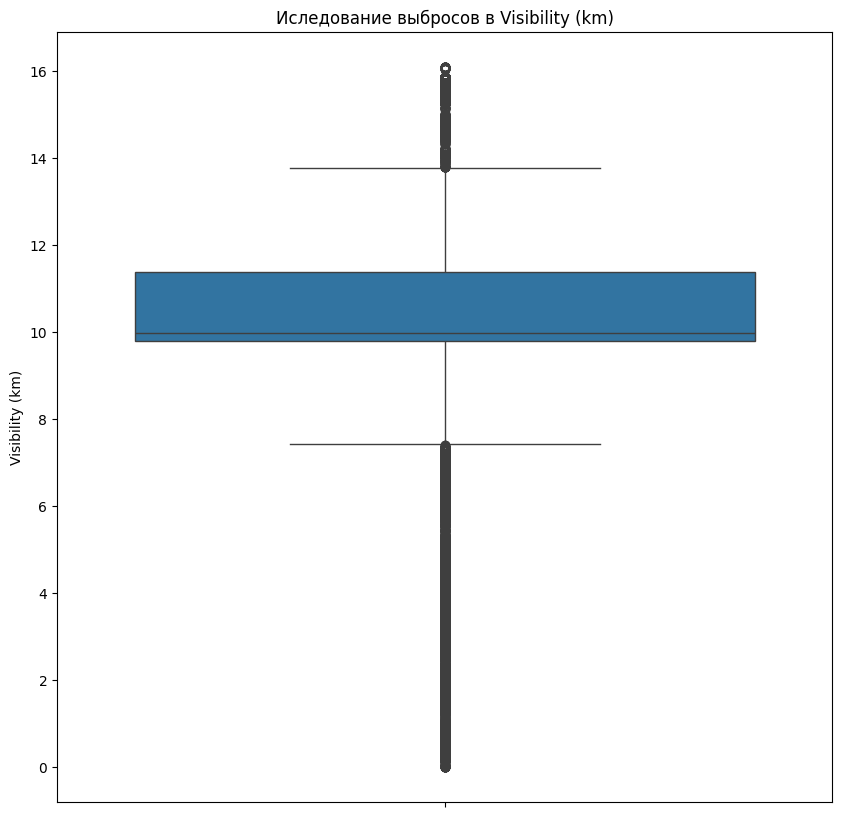

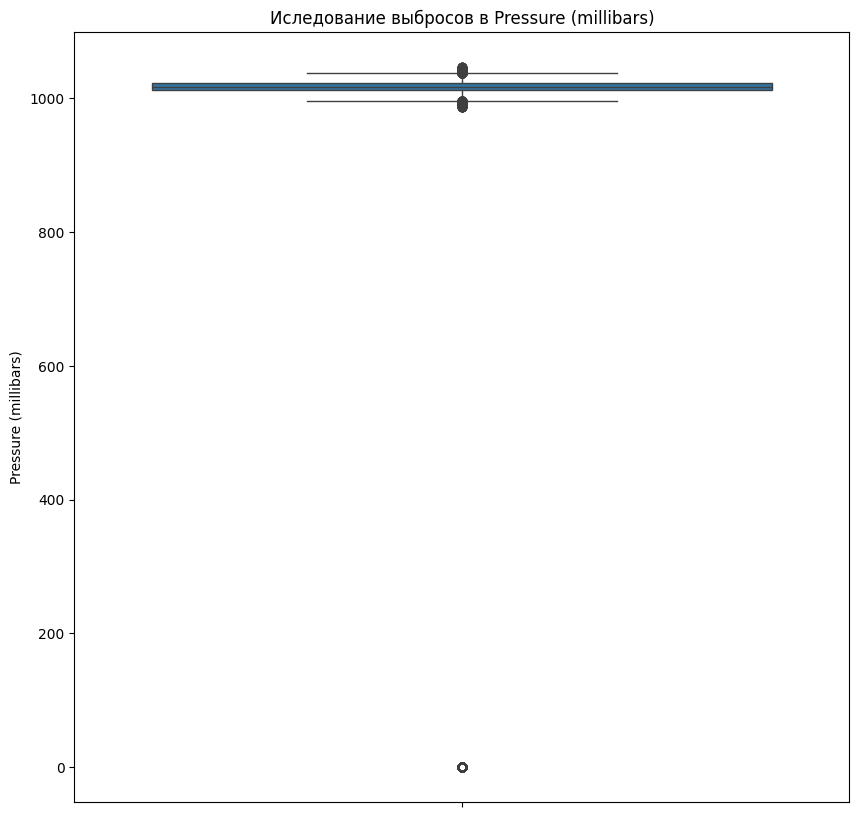

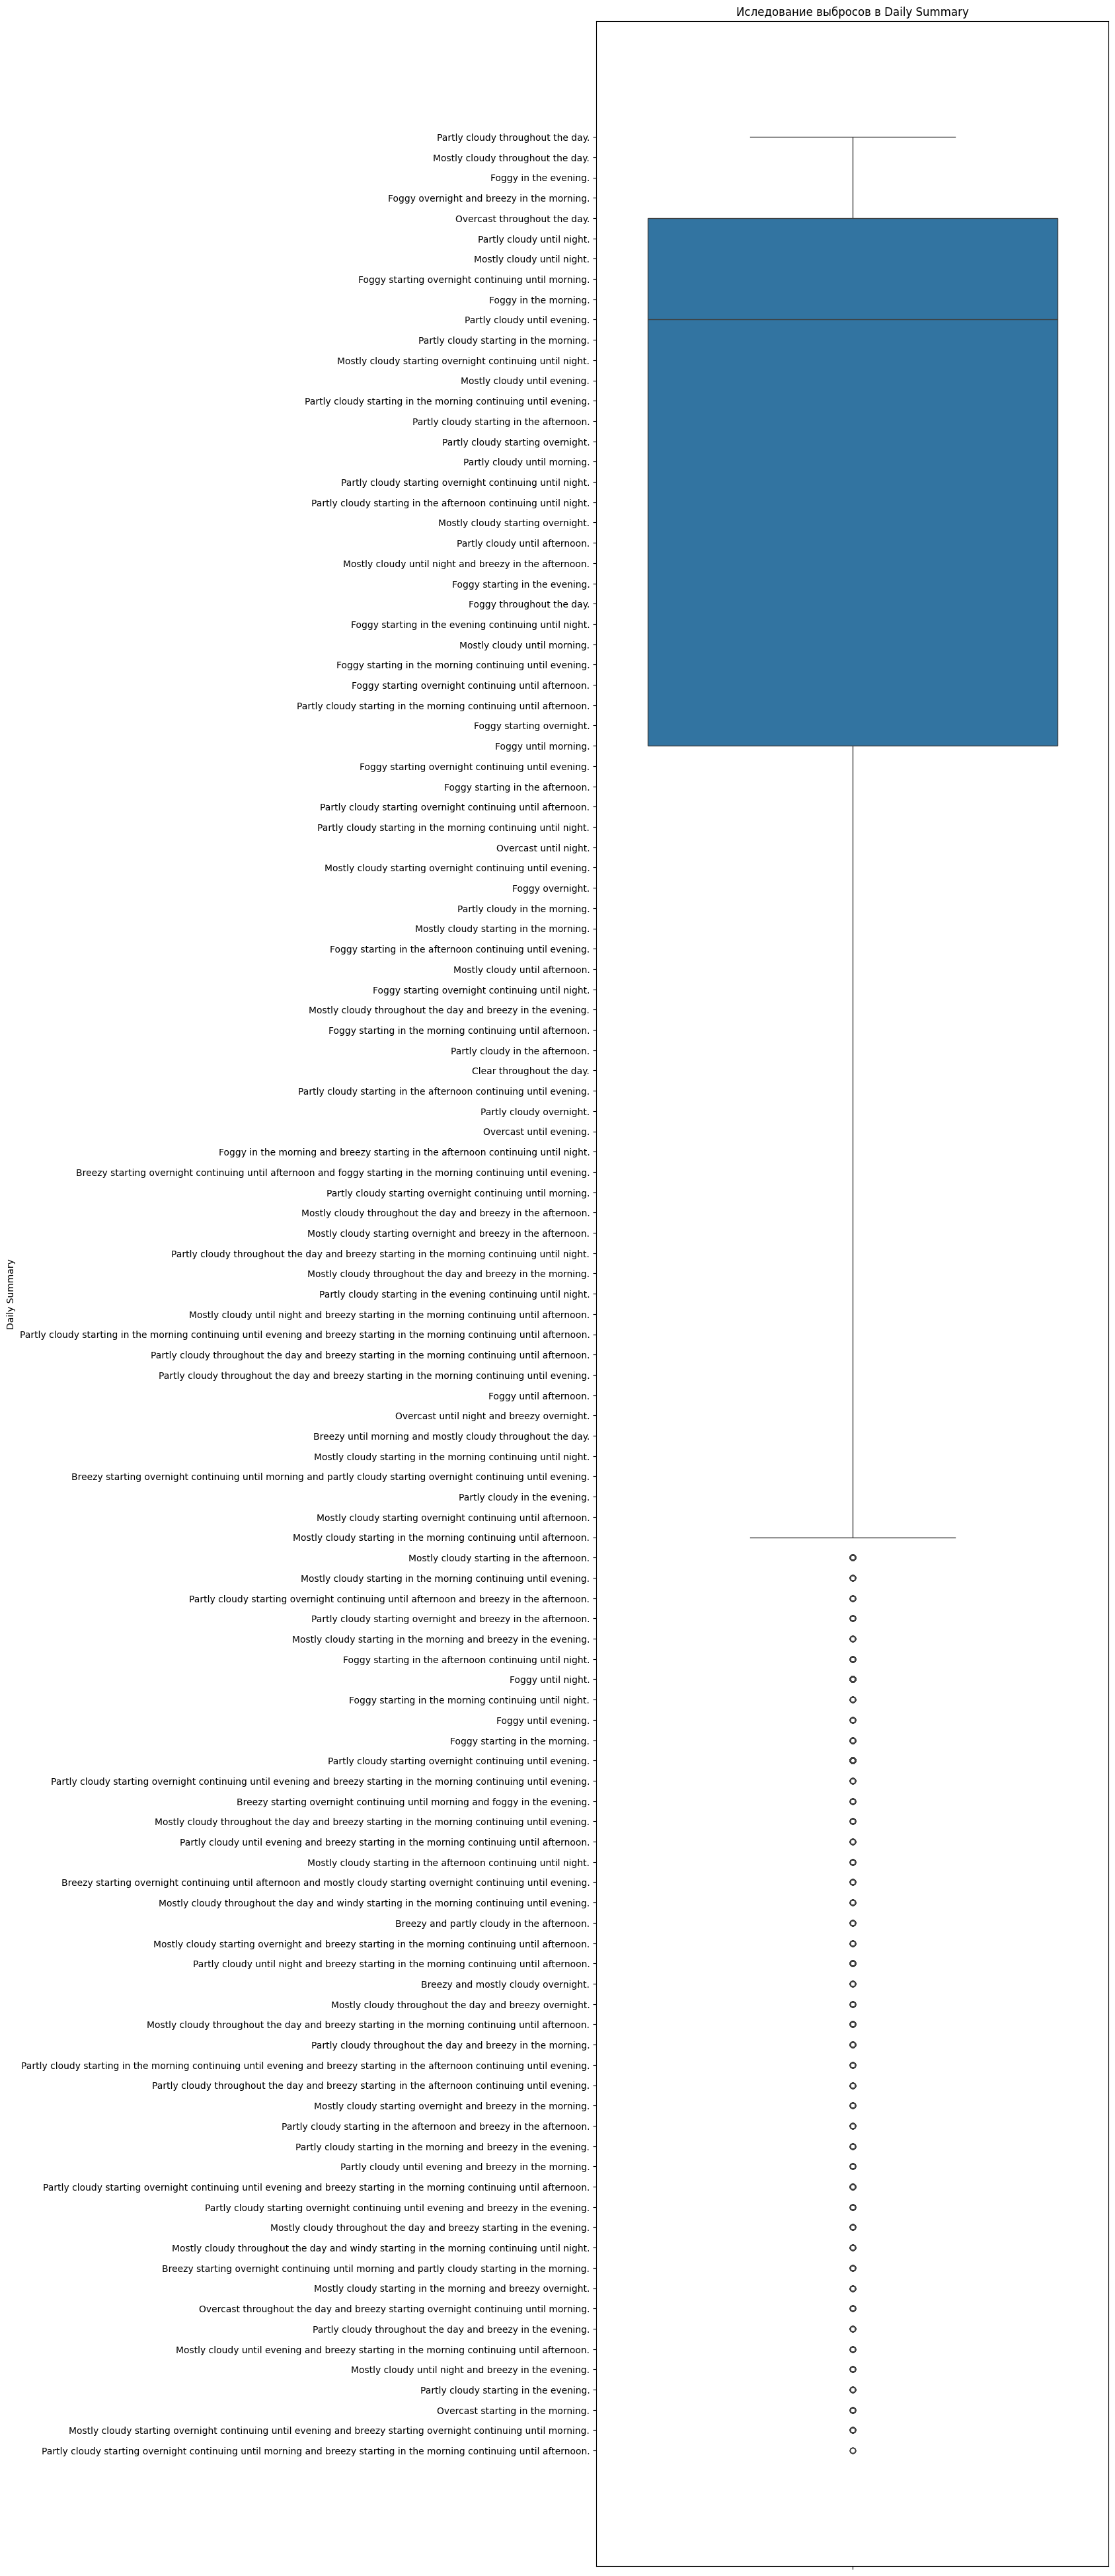

в среднем темперетура от 5 до 20 градусов C, но может доходить до -15 или до 40
выбросы: ниже -15 до -25


In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv("weatherHistory.csv")
df.head()

print(df.isnull().any())
print('Есть пустые значения Precip Type')

df1 = df.copy()

df1["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df1["month"] = df1["Formatted Date"].dt.month
df1["day"] = df1["Formatted Date"].dt.day
df1["hour"] = df1["Formatted Date"].dt.hour
numeric_columns = df1.select_dtypes(include=['number']).drop(["Loud Cover"], axis=1)
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_columns.corr(), yticklabels=numeric_columns.corr(), cmap='RdYlGn', center=0, annot=True, fmt=".2f")

plt.show()

print('из этой корреляции можно сделать следующие выводы')

print("настоящая температура почти сходна с ощущаемой")
print('в высокую влажность температура сильно ниже, также есть связь с видимостью (потому что видимость также ниже '
      'при высокой влажности)')
print("также температура в этом месте немного меняется в течение дня или в разные месяцы (есть корр. с часами и "
      "месяцами")
print('от остальных параметров темп. почти не зависит')

for i in df.drop(columns=['Loud Cover', 'Formatted Date'], axis=1):
    if i == "Daily Summary":
        plt.figure(figsize=(10, 50))
    else:
        plt.figure(figsize=(10, 10))
    sns.boxplot(data=df[i])
    plt.title(f"Иследование выбросов в {i}")
    plt.show()

print('в среднем темперетура от 5 до 20 градусов C, но может доходить до -15 или до 40')
print("выбросы: ниже -15 до -25")


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

df = pd.read_csv("weatherHistory.csv")
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)
df.dropna(inplace=True)
df.drop(columns=["Apparent Temperature (C)"], inplace=True, axis=1)


df["month"] = df["Formatted Date"].dt.month
df["day"] = df["Formatted Date"].dt.day
df["hour"] = df["Formatted Date"].dt.hour

X = df.drop(columns=['Temperature (C)'], axis=1).select_dtypes(include="number")
Y = df['Temperature (C)']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {Y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {Y_test.shape}')

model = LinearRegression()
model.fit(X_train, Y_train)

print("Temperature (C) = ",end='')
print(f"{model.intercept_:.2f}", end="")
for i, coef in enumerate(model.coef_):
    print(f" + {coef:.2f} * {X.columns[i]}",end="")
print()

print("Значимые коэфы: "
      "Влажность, "
      "Скорость ветра, "
      "Видимость"
      "Месяц в году")

print('Сходно с таблицей корреляций')

Y_pred = model.predict(X_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

print("не высокие показатели отклонений что хорошо, но при этом низкий R2 - низкая точность")

mmsc = MinMaxScaler()
X_norm_train = mmsc.fit_transform(X_train)
X_norm_train = pd.DataFrame(X_norm_train)

X_norm_test = mmsc.fit_transform(X_test)
X_norm_test = pd.DataFrame(X_norm_test)


model = LinearRegression()
model.fit(X_norm_train, Y_train)

print("Temperature (C) = ",end='')
print(f"{model.intercept_:.2f}", end="")
for i, coef in enumerate(model.coef_):
    print(f" + {coef:.2f} * {X.columns[i]}",end="")
print()

Y_pred = model.predict(X_norm_test)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

print("при нормализации данных можно сделать вывод, что коэф Скорости Ветра и видимости и месяца стал более значимым")
print("точность почти не изменилась")

Train dataset size: (38701, 9), (38701,)
Test dataset size: (16587, 9), (16587,)
Temperature (C) = 31.46 + -31.05 * Humidity + -0.20 * Wind Speed (km/h) + 0.00 * Wind Bearing (degrees) + 0.51 * Visibility (km) + -0.00 * Loud Cover + -0.00 * Pressure (millibars) + 0.47 * month + -0.00 * day + -0.03 * hour
Значимые коэфы: Влажность, Скорость ветра, ВидимостьМесяц в году
Сходно с таблицей корреляций
MAE: 5.58
MSE: 48.51
R2: 0.49
не высокие показатели отклонений что хорошо, но при этом низкий R2 - низкая точность
Temperature (C) = 31.93 + -31.05 * Humidity + -12.92 * Wind Speed (km/h) + 1.20 * Wind Bearing (degrees) + 8.20 * Visibility (km) + 0.00 * Loud Cover + -3.45 * Pressure (millibars) + 5.20 * month + -0.14 * day + -0.61 * hour
MAE: 5.60
MSE: 48.65
R2: 0.49
при нормализации данных можно сделать вывод, что коэф Скорости Ветра и видимости и месяца стал более значимым
точность почти не изменилась
